In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
mat = loadmat("../data/ex7data2.mat")
X = mat["X"]

**findClosestCentroids** find the closest centroids by evaluating the distance between the training example from each centroid and assign the centroid to the training example with the smallest distance.

In [7]:
def findClosestCentroids(X, centroids):
    """
    Returns the closest centroids in idx for a dataset X where each row is a single example.
    """
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0],1))
    temp = np.zeros((centroids.shape[0],1))
    
    for i in range(X.shape[0]):
        for j in range(K):
            dist = X[i,:] - centroids[j,:]
            #-----------------------------
            ## euclidean Distance
            length = np.sum(dist**2)
            #-----------------------------
            temp[j] = length
        idx[i] = np.argmin(temp)+1
    return idx
#-------------------------------------------
# Select an initial set of centroids
K = 3
# Manual Selection
initial_centroids = np.array([[3,3],[6,2],[8,5]])
#-------------------------------------------
idx = findClosestCentroids(X, initial_centroids)
print("Closest centroids for the first 3 examples:\n",idx[0:3])

Closest centroids for the first 3 examples:
 [[1.]
 [3.]
 [2.]]


**NOTE:** np.argmin find the index with the smallest distance and assign it to the training example. +1 is used here to number the centroid from 1 instead of 0.

In [3]:
def computeCentroids(X, idx, K):
    """
    returns the new centroids by computing the means of the data points assigned to each centroid.
    """
    m, n = X.shape[0],X.shape[1]
    centroids = np.zeros((K,n))
    count = np.zeros((K,1))
    
    for i in range(m):
        index = int((idx[i]-1)[0])
        centroids[index,:]+=X[i,:]
        count[index]+=1
    
    return centroids/count
centroids = computeCentroids(X, idx, K)
print("Centroids computed after initial finding of closest centroids:\n", centroids)

Centroids computed after initial finding of closest centroids:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


## K-means Clustering and Visualization
Now to visualize the whole process, I created a subplot for each iteration of the algorithms to monitor the movement of the centroids and assignment of the training examples.

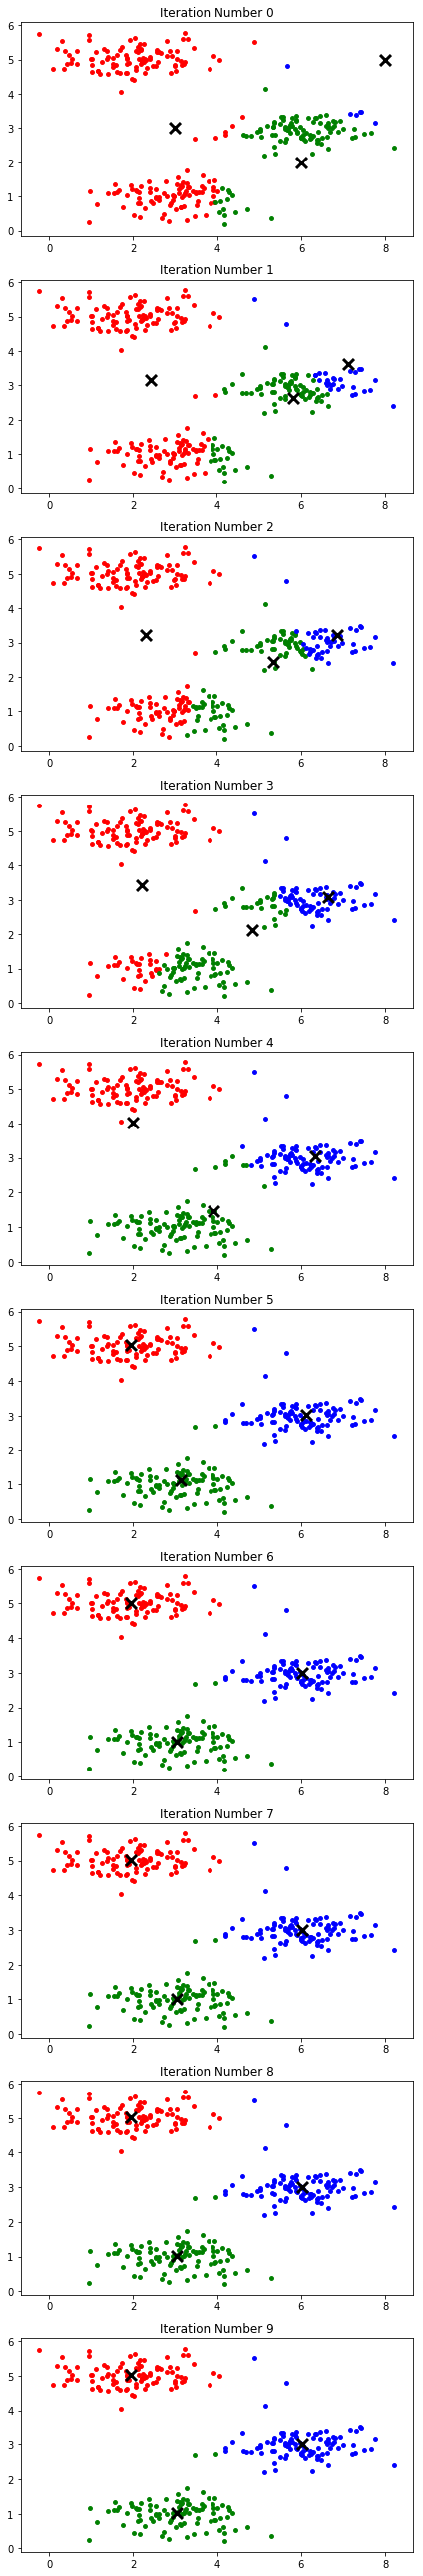

In [5]:
def Kmeans(X, centroids, idx, K, num_iters):
    """
    plots the data points with colors assigned to each centroid
    """
    m,n = X.shape[0],X.shape[1]
    
    fig, ax = plt.subplots(nrows=num_iters,ncols=1,figsize=(6,36))
    
    for i in range(num_iters):    
        # Visualisation of data
        color = "rgb"
        for k in range(1,K+1):
            grp = (idx==k).reshape(m,1)
            ax[i].scatter(X[grp[:,0],0],X[grp[:,0],1],c=color[k-1],s=15)
        # visualize the new centroids
        ax[i].scatter(centroids[:,0],centroids[:,1],s=120,marker="x",c="black",linewidth=3)
        title = "Iteration Number " + str(i)
        ax[i].set_title(title)
        
        #---------------------------------------
        # Compute the centroids mean
        centroids = computeCentroids(X, idx, K)
        #---------------------------------------        
        # assign each training example to the nearest centroid
        idx = findClosestCentroids(X, centroids)
        #---------------------------------------
    
    plt.tight_layout()
m,n = X.shape[0],X.shape[1]
Kmeans(X, initial_centroids,idx, K,10)

Since K-means algorithms do not always give the optimal solution, random initialization is important.

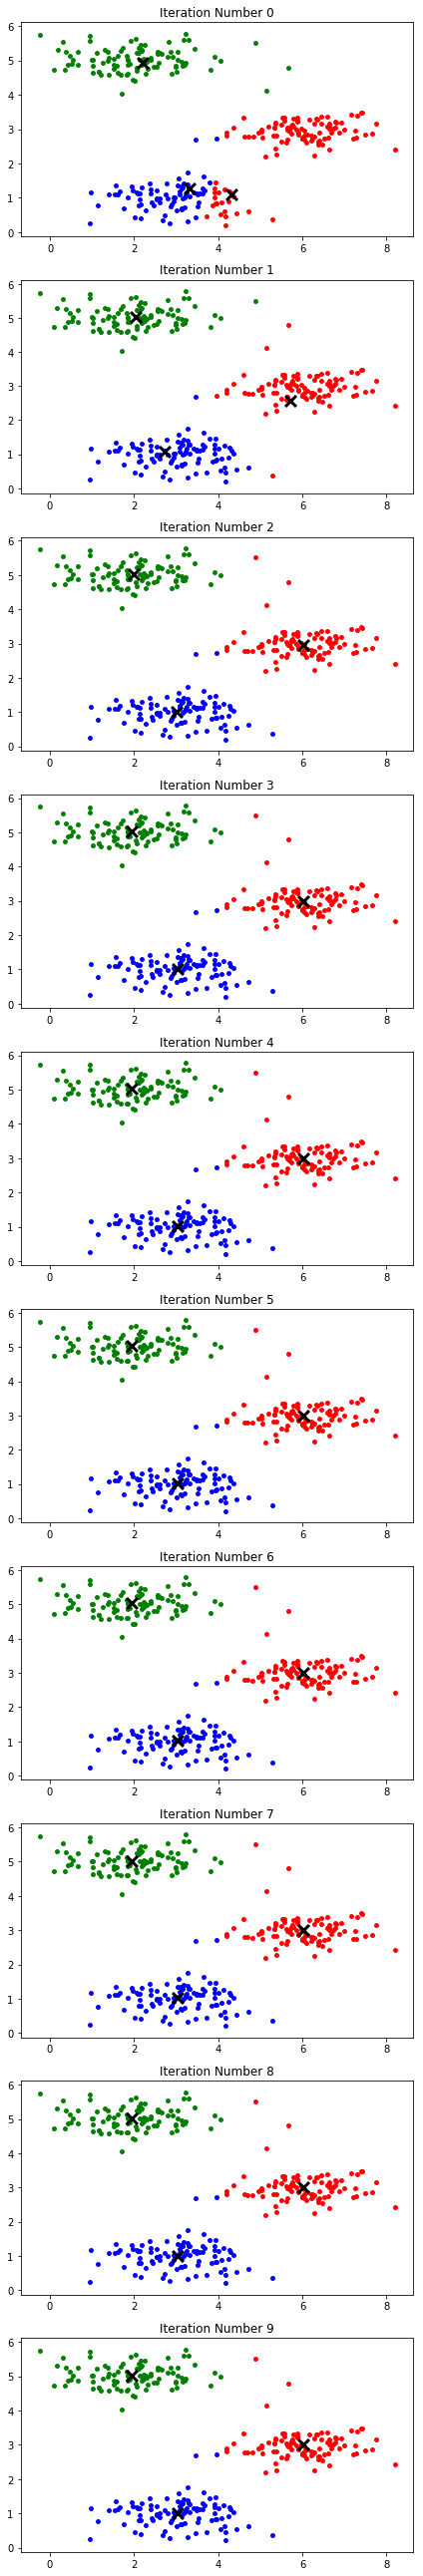

In [9]:
def kMeansInitCentroids(X, K):
    """
    This function initializes K centroids that are to be used in K-Means on the dataset X
    """
    m,n = X.shape[0], X.shape[1]
    centroids = np.zeros((K,n))
    
    for i in range(K):
        centroids[i] = X[np.random.randint(0,m+1),:]
        
    return centroids
centroids = kMeansInitCentroids(X, K)
idx = findClosestCentroids(X, centroids)
Kmeans(X, centroids,idx, K,10)